<a href="https://colab.research.google.com/github/Safa30/CSE475_Machine_Learning/blob/main/Lab/lab_1/Lab1_Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 1 - Decision Tree

Classify Mushroom Using Decision Tree and Random Forest.

Dataset: https://archive.ics.uci.edu/dataset/73/mushroom

Task details:

2.   Perform Exploratory Data Analysis (EDA) on the dataset.
3.   Evaluate and compare Random Forest tree accuracy for the following n_estimators values 1,50,100,150,200, and 250.
4.   Evaluate and compare performance of Random Forest and Decision Tree.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the Mushroom Dataset

In [10]:
# Define the URL for the Mushroom dataset from the UCI Machine Learning Repository.
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

# Define column names based on the UCI dataset documentation.
# The dataset lacks a header, so providing names manually is crucial for interpretability.
column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
    'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Load the dataset into a pandas DataFrame.
# 'header=None' indicates that the dataset does not contain a header row.
# 'names=column_names' assigns the predefined column names to the DataFrame.
df = pd.read_csv(dataset_url, header=None, names=column_names)

# Display the first 5 rows of the DataFrame to confirm successful loading and inspect initial data.
print("Dataset loaded successfully. Displaying the first 5 rows:")
display(df.head())

Dataset loaded successfully. Displaying the first 5 rows:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Dataset Information Overview

In [11]:
# Retrieve and display the number of instances (rows) and features (columns) in the DataFrame.
# This provides a quick overview of the dataset's dimensions.
num_instances, num_features = df.shape
print(f"Number of instances (rows): {num_instances}")
print(f"Number of features (columns): {num_features}")

# Display information about the DataFrame, including column names, non-null counts, and data types.
# This step is essential for understanding data completeness and types, which guides subsequent preprocessing.
print("\nDataFrame Information:")
df.info()

# Analyze the distribution of the target variable, 'class' (edible vs. poisonous).
# 'value_counts()' provides the count of unique values in the 'class' column.
# This reveals the balance or imbalance of the dataset's target classes, important for model training.
print("\nClass Distribution (e=edible, p=poisonous):")
display(df['class'].value_counts())

Number of instances (rows): 8124
Number of features (columns): 23

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   

,count
class,
e,4208
p,3916


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Analyze Unique Values in Each Column

In [13]:
for col in df.columns:
    print(f"Column '{col}':")
    print(df[col].unique())
    print(f"Number of unique values: {df[col].nunique()}\n")

Column 'class':
['p' 'e']
Number of unique values: 2

Column 'cap-shape':
['x' 'b' 's' 'f' 'k' 'c']
Number of unique values: 6

Column 'cap-surface':
['s' 'y' 'f' 'g']
Number of unique values: 4

Column 'cap-color':
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Number of unique values: 10

Column 'bruises':
['t' 'f']
Number of unique values: 2

Column 'odor':
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Number of unique values: 9

Column 'gill-attachment':
['f' 'a']
Number of unique values: 2

Column 'gill-spacing':
['c' 'w']
Number of unique values: 2

Column 'gill-size':
['n' 'b']
Number of unique values: 2

Column 'gill-color':
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Number of unique values: 12

Column 'stalk-shape':
['e' 't']
Number of unique values: 2

Column 'stalk-root':
['e' 'c' 'b' 'r' '?']
Number of unique values: 5

Column 'stalk-surface-above-ring':
['s' 'f' 'k' 'y']
Number of unique values: 4

Column 'stalk-surface-below-ring':
['s' 'f' 'y' 'k']
Number of unique values: 4



## Summary Statistics for Object Columns

In [14]:
display(df.describe(include='object'))

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Handle Missing Values and Encode Categorical Features

In [15]:
# Identify columns containing '?'
columns_with_question_mark = []
for col in df.columns:
    if '?' in df[col].unique():
        columns_with_question_mark.append(col)

print(f"Columns containing '?' values: {columns_with_question_mark}")

# The dataset contains '?' as a valid category in 'stalk-root'.
# One-hot encoding will convert all categorical features (including '?' if present) into numerical format.
# This is a suitable approach for this dataset where all features are nominal categorical.

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=False) # Keep all categories for now
y = y.map({'p': 1, 'e': 0}) # Map target variable to numerical (poisonous=1, edible=0)

print("\nDataFrame after one-hot encoding and target mapping:")
display(X.head())
display(y.head())

Columns containing '?' values: ['stalk-root']

DataFrame after one-hot encoding and target mapping:


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


,class
0,1
1,0
2,0
3,1
4,0


In [16]:
print("Shape of encoded DataFrame X:", X.shape)

Shape of encoded DataFrame X: (8124, 117)


In [17]:
display(X.head())

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [18]:
display(X.describe())

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,7672,8120,4972,7296,8092,4468,5804,8120,5568,4880,...,6876,4084,6412,4976,5976,7292,7832,6980,7756,7932


## Check for Standard Missing Values



**Reasoning**:
To confirm that there are no standard missing values (NaN) in the DataFrame, I will calculate the sum of null values for each column using `df.isnull().sum()` and display the result.



In [19]:
print("Sum of null values for each column:")
display(df.isnull().sum())

Sum of null values for each column:


,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


**Reasoning**:
 I will proceed to the next part of the subtask, which is to visualize the distribution of the target variable 'class' using a bar plot to understand its balance.



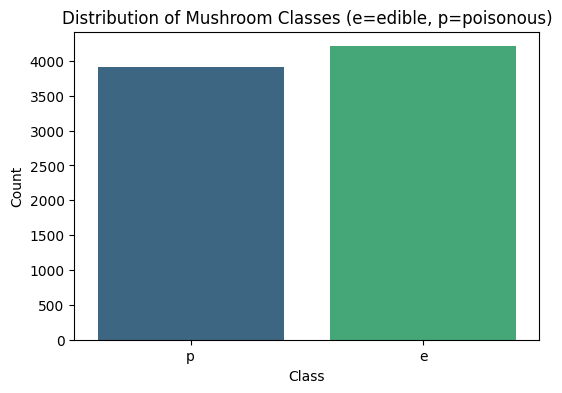

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class', hue='class', palette='viridis', legend=False)
plt.title('Distribution of Mushroom Classes (e=edible, p=poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Reasoning**:
Now that the target variable distribution has been visualized, I will proceed with the frequency analysis of key categorical features, starting with 'odor'. I will display the value counts for the 'odor' column to understand the distribution of its categories.



In [23]:
print("Value counts for 'odor' column:")
display(df['odor'].value_counts())

Value counts for 'odor' column:


,count
odor,
n,3528
f,2160
s,576
y,576
a,400
l,400
p,256
c,192
m,36


**Reasoning**:
After displaying the value counts for the 'odor' column, I will now visualize its distribution using a bar plot to provide a clearer understanding of the frequencies of each odor type.



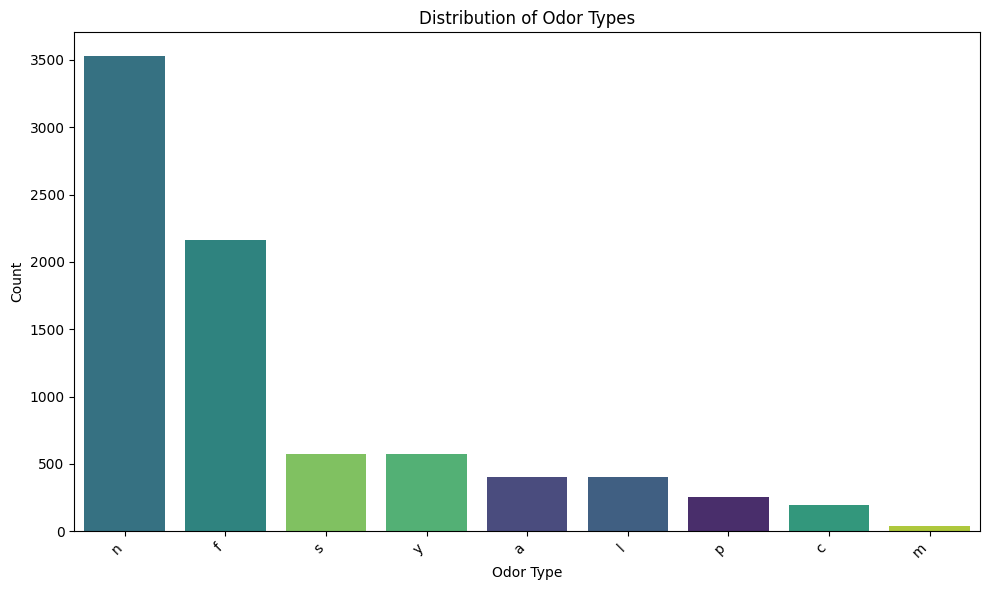

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='odor', order=df['odor'].value_counts().index, palette='viridis', hue='odor', legend=False)
plt.title('Distribution of Odor Types')
plt.xlabel('Odor Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Following the analysis of 'odor', I will now conduct a frequency analysis for the 'habitat' column. First, I will display its value counts to understand the distribution of different habitat types.



In [26]:
print("Value counts for 'habitat' column:")
display(df['habitat'].value_counts())

Value counts for 'habitat' column:


,count
habitat,
d,3148
g,2148
p,1144
l,832
u,368
m,292
w,192


**Reasoning**:
After displaying the value counts for the 'habitat' column, I will now visualize its distribution using a bar plot to provide a clearer understanding of the frequencies of each habitat type.



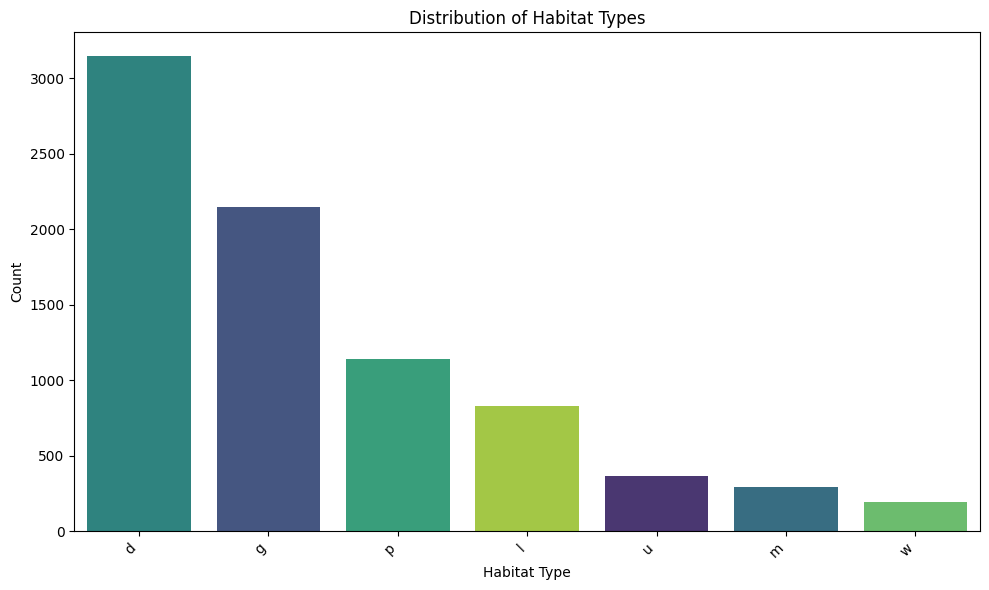

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='habitat', order=df['habitat'].value_counts().index, palette='viridis', hue='habitat', legend=False)
plt.title('Distribution of Habitat Types')
plt.xlabel('Habitat Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Following the analysis of 'habitat', I will now conduct a frequency analysis for the 'cap-color' column. First, I will display its value counts to understand the distribution of different cap color types.



In [28]:
print("Value counts for 'cap-color' column:")
display(df['cap-color'].value_counts())

Value counts for 'cap-color' column:


,count
cap-color,
n,2284
g,1840
e,1500
y,1072
w,1040
b,168
p,144
c,44
u,16


**Reasoning**:
After displaying the value counts for the 'cap-color' column, I will now visualize its distribution using a bar plot to provide a clearer understanding of the frequencies of each cap color type.



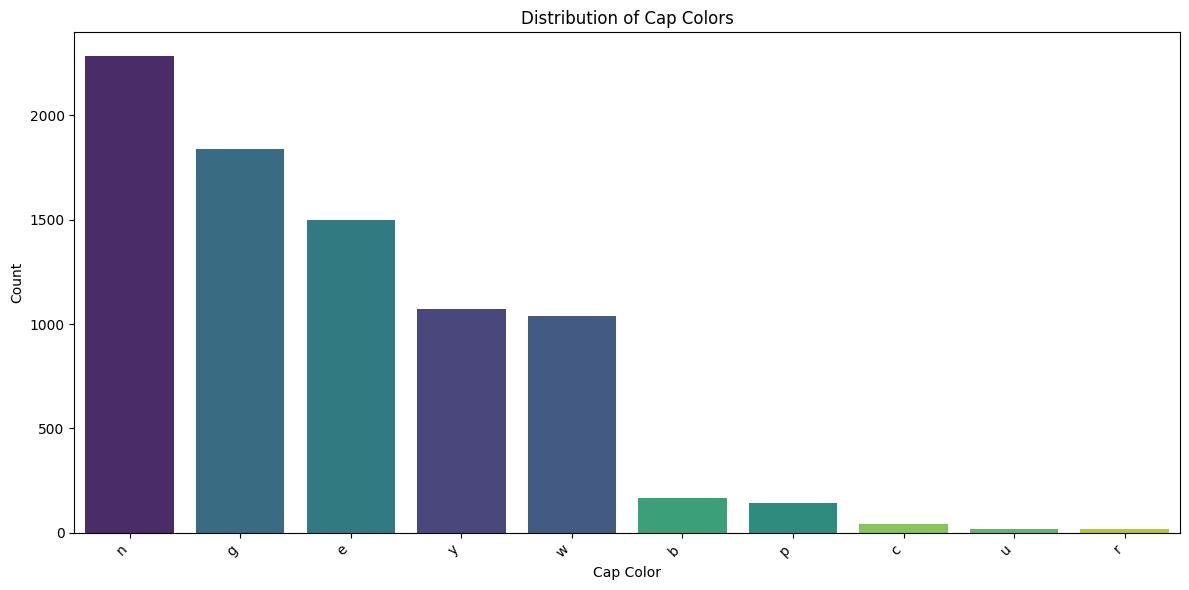

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cap-color', order=df['cap-color'].value_counts().index, palette='viridis', hue='cap-color', legend=False)
plt.title('Distribution of Cap Colors')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Following the analysis of 'cap-color', I will now conduct a frequency analysis for the 'gill-color' column. First, I will display its value counts to understand the distribution of different gill color types.



In [32]:
print("Value counts for 'gill-color' column:")
display(df['gill-color'].value_counts())

Value counts for 'gill-color' column:


,count
gill-color,
b,1728
p,1492
w,1202
n,1048
g,752
h,732
u,492
k,408
e,96


**Reasoning**:
After displaying the value counts for the 'gill-color' column, I will now visualize its distribution using a bar plot to provide a clearer understanding of the frequencies of each gill color type.



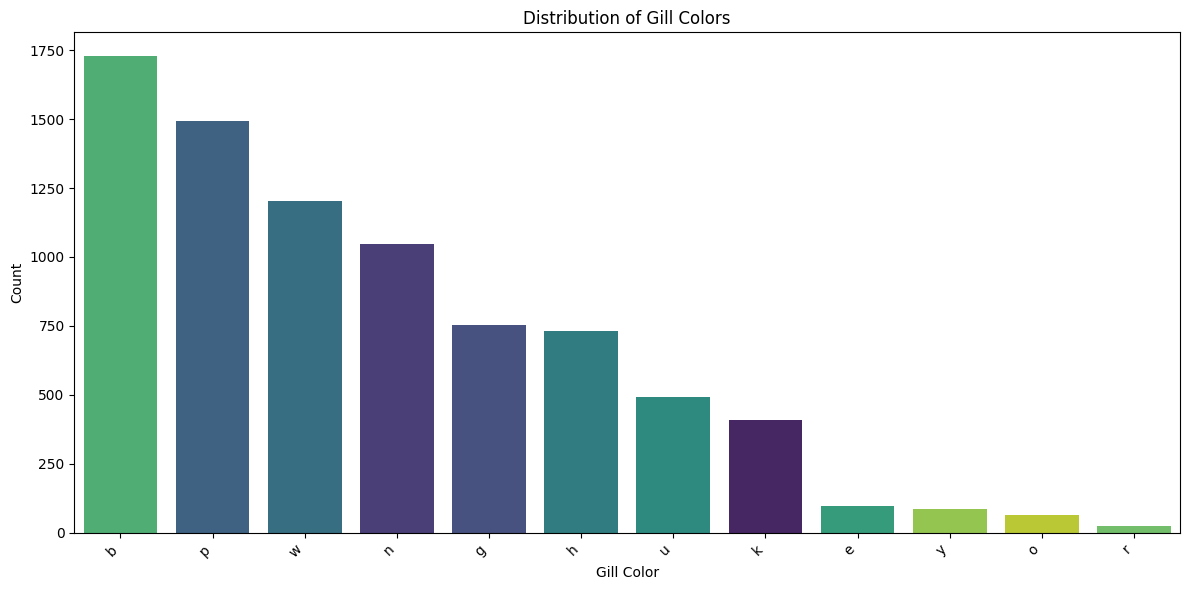

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='gill-color', order=df['gill-color'].value_counts().index, palette='viridis', hue='gill-color', legend=False)
plt.title('Distribution of Gill Colors')
plt.xlabel('Gill Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

The exploratory data analysis revealed several important observations regarding the dataset's characteristics, class distribution, and feature frequencies.

### Data Analysis Key Findings
*   **Missing Values**: No standard `NaN` missing values were found in the dataset across any column. The 'stalk-root' column contains '?' as a categorical value, which is not considered a standard `NaN`.
*   **Target Variable Distribution**: The 'class' variable, representing edible vs. poisonous mushrooms, exhibits a relatively balanced distribution, indicating no severe class imbalance issues that could negatively impact model training.
*   **Odor Feature Distribution**: 'n' (none) is the most frequent odor type, followed by 'f' (foul) and 's' (spicy). The varied distribution suggests its potential as a strong predictor.
*   **Habitat Feature Distribution**: 'd' (woods) and 'g' (grasses) are the most common habitats for mushrooms, with 'p' (paths) also being significant, showcasing a diverse range of habitat types.
*   **Cap-Color Feature Distribution**: The most frequent cap colors are 'n' (brown), 'g' (gray), and 'e' (red), indicating a wide variety of cap colors with potential predictive power.
*   **Gill-Color Feature Distribution**: 'b' (buff) and 'p' (pink) are the most dominant gill colors, followed by 'w' (white) and 'n' (brown), showing a good spread across different categories.

### Insights:
*   The relatively balanced distribution of the target variable and the diverse distributions of key categorical features suggest that this dataset is well-suited for training classification models.
*   Further analysis could involve exploring the relationship between these key categorical features and the target variable 'class' to identify specific feature values that strongly correlate with edibility or poisonousness, potentially using techniques like chi-squared tests or mutual information.


## Prepare Data for Correlation


**Reasoning**:
To combine the one-hot encoded features and the target variable, I will use `pd.concat` along `axis=1` to create a new DataFrame `df_encoded`.



In [35]:
df_encoded = pd.concat([X, y], axis=1)

print("Combined DataFrame (df_encoded) head:")
display(df_encoded.head())
print("Shape of combined DataFrame:", df_encoded.shape)

Combined DataFrame (df_encoded) head:


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,1
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0
3,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,1
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,0


Shape of combined DataFrame: (8124, 118)


**Reasoning**:
Now that the `df_encoded` DataFrame has been created by combining the features and the target variable, I will calculate the pairwise correlation matrix for all columns in this DataFrame using the `.corr()` method.



In [36]:
correlation_matrix = df_encoded.corr()

print("Correlation Matrix head:")
display(correlation_matrix.head())
print("Correlation Matrix shape:", correlation_matrix.shape)

Correlation Matrix head:


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
cap-shape_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,...,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764,-0.182567
cap-shape_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,...,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,0.023007
cap-shape_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,...,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450,0.018526
cap-shape_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,...,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003,0.163565
cap-shape_s,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,-0.051272,...,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784,-0.060664


Correlation Matrix shape: (118, 118)


**Reasoning**:
With the correlation matrix calculated, I will now visualize it using a heatmap to identify patterns and relationships between features and the target variable. Given the large number of features, I'll set an appropriate figure size to ensure readability.



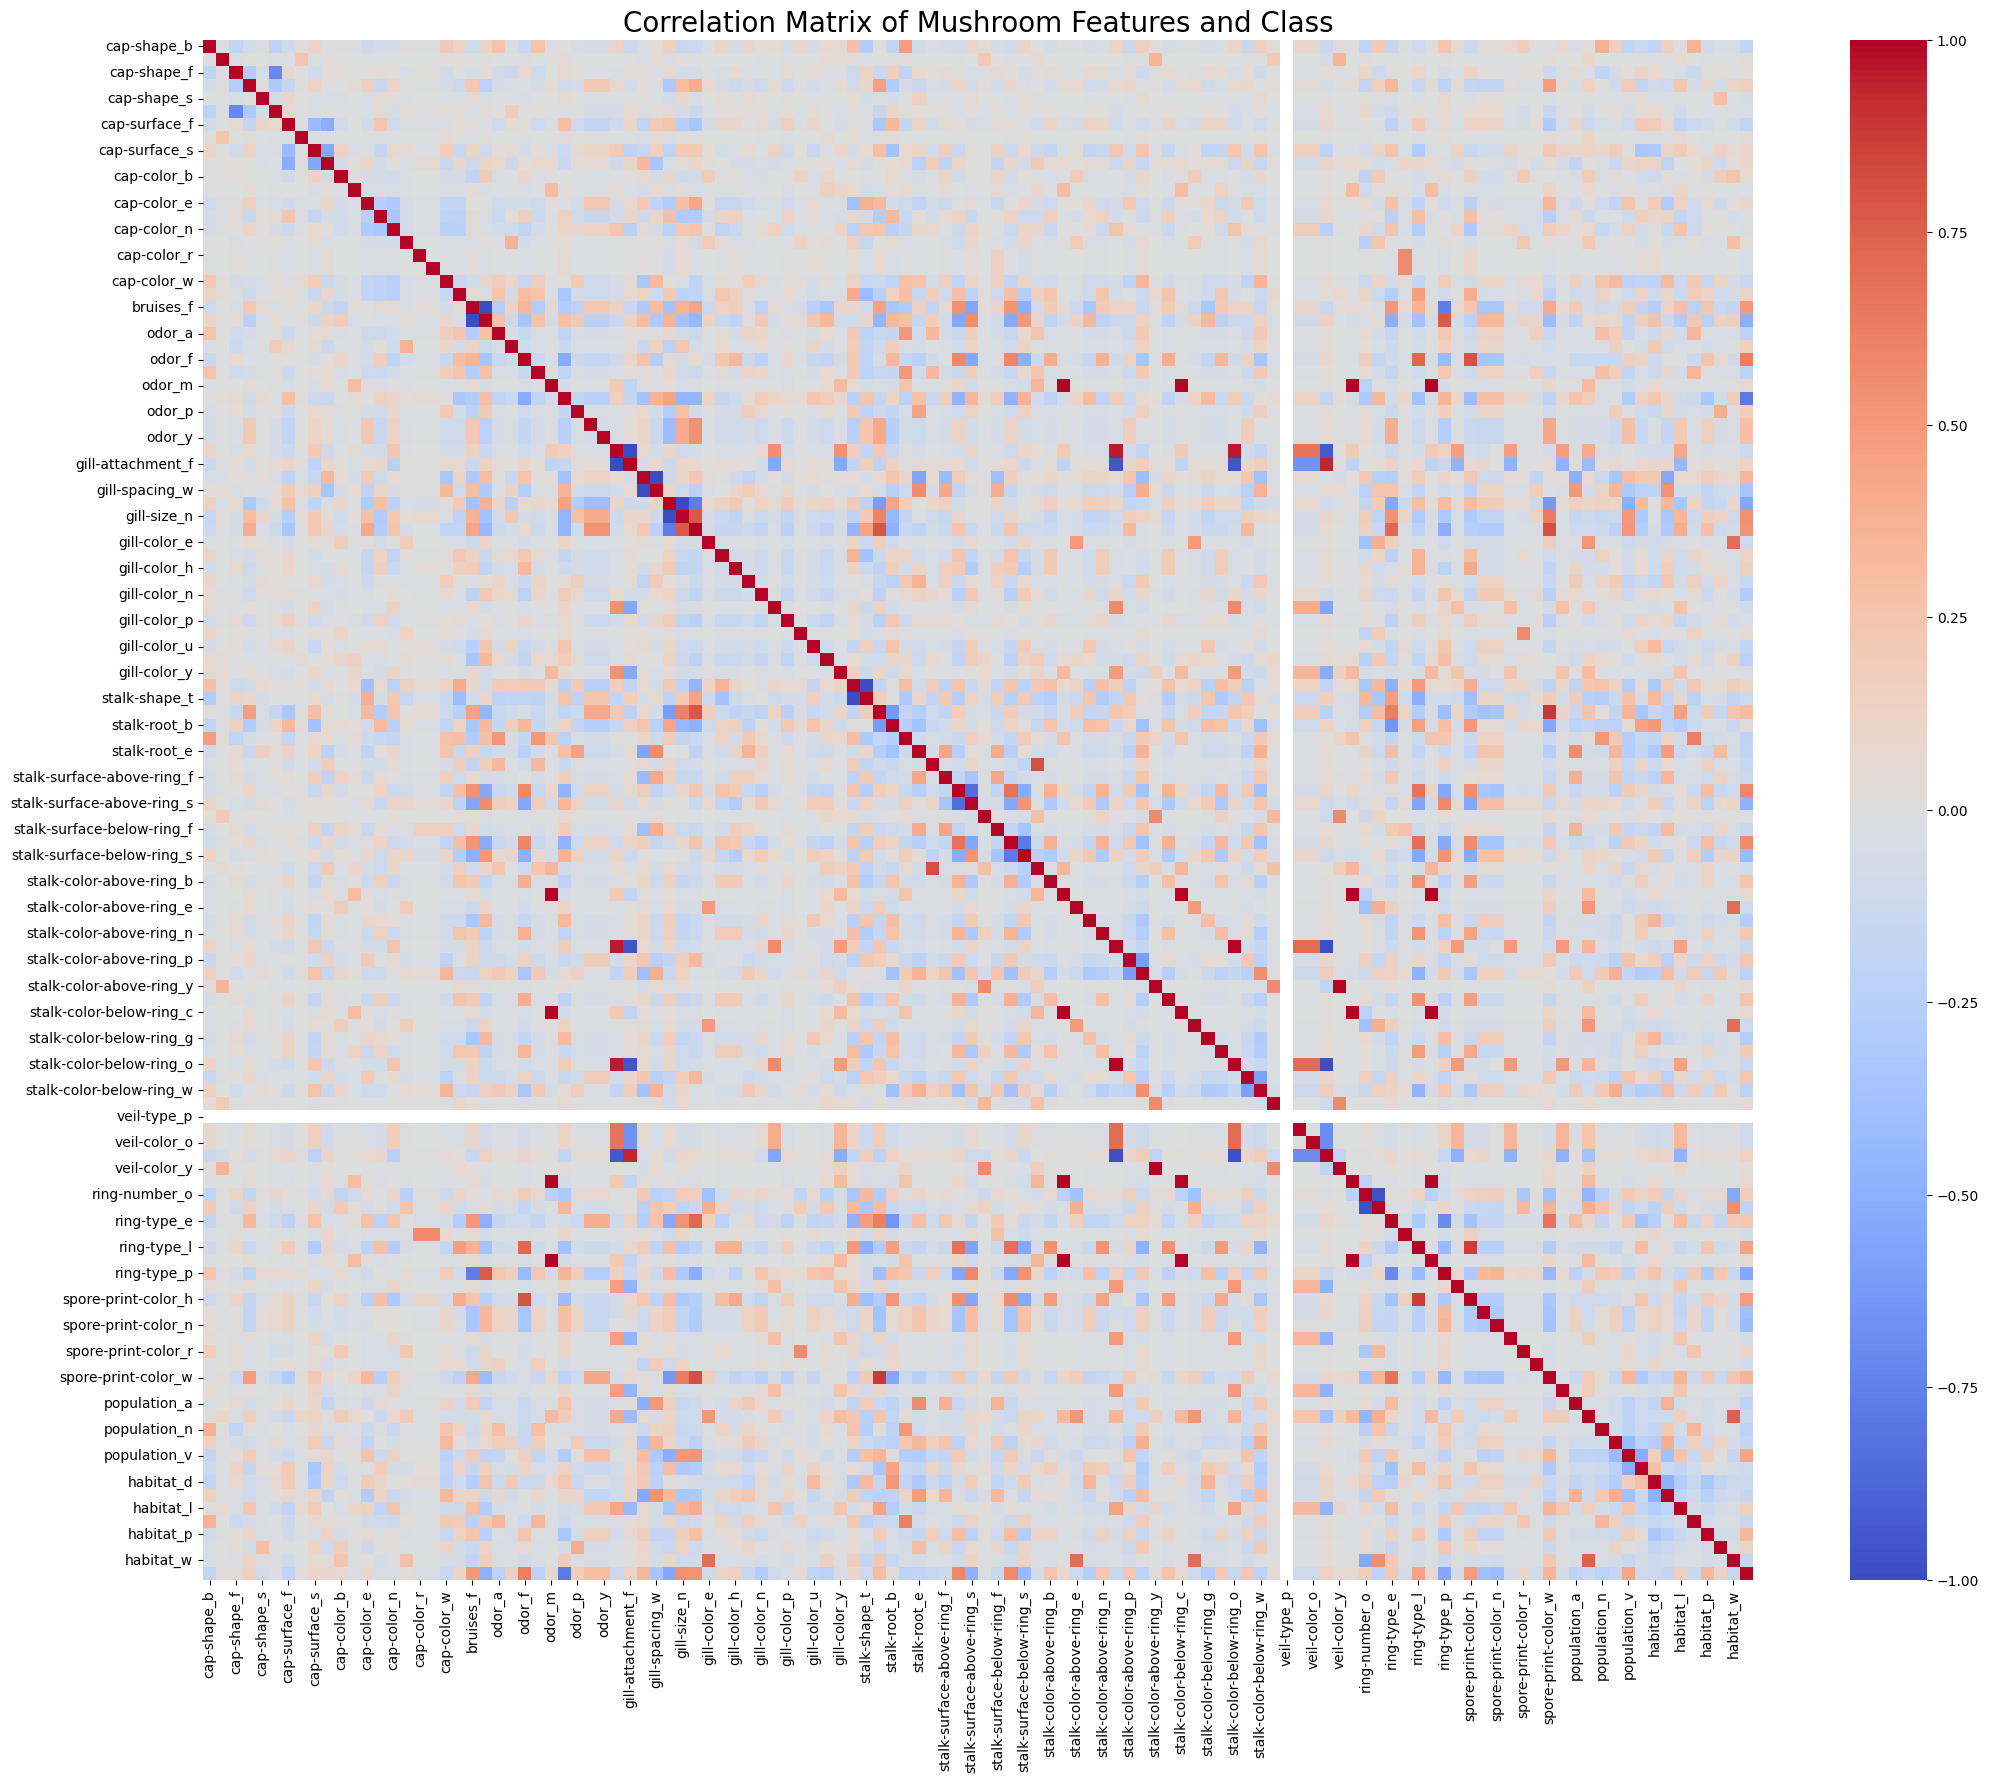

In [37]:
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f") # annot=False due to large number of features
plt.title('Correlation Matrix of Mushroom Features and Class', fontsize=20)
plt.show()

## Summary of Correlation Analysis

The heatmap of the correlation matrix provides insights into the relationships between the one-hot encoded features and the target variable ('class').

### Key Observations:

*   **Strong Correlations with 'class'**: While direct observation of individual cells in the heatmap is challenging due to the high dimensionality, distinct blocks of highly correlated features and features highly correlated with the 'class' target variable are visible. For example, certain one-hot encoded features related to `odor`, `gill-color`, and `stalk-root` appear to have strong positive or negative correlations with the `class` variable (represented by the last row/column). These strong correlations suggest that these features are significant predictors of whether a mushroom is edible or poisonous.

*   **Inter-Feature Correlations**: There are noticeable clusters of correlations among the features themselves. This is expected given that some original categorical features have multiple one-hot encoded columns. For instance, `cap-shape_b` and `cap-shape_x` will naturally have a negative correlation since they represent mutually exclusive categories of the same original feature.

*   **Overall Pattern**: The heatmap generally shows a mix of positive and negative correlations across different features. The `coolwarm` colormap helps to easily identify features that move in the same direction (warm colors) or opposite directions (cool colors) relative to each other or the target variable.

### Insights:

*   The presence of clearly defined patterns of correlation, especially with the 'class' variable, suggests that these features are highly informative for mushroom classification.
*   Further investigation could involve extracting the specific correlation values for the 'class' column to precisely identify the most influential features. This would quantitatively confirm the visual insights gained from the heatmap.

## Justify Label Encoding

### Explanation of Label Encoding vs. One-Hot Encoding for the Mushroom Dataset

For the Mushroom dataset, which consists entirely of nominal categorical features, the choice between label encoding and one-hot encoding is crucial, especially when working with tree-based models like Decision Trees and Random Forests.

#### Why Label Encoding is a Suitable Choice Here:

1.  **Reduced Dimensionality**: The Mushroom dataset has 22 categorical features (excluding the target 'class'), many of which have a significant number of unique categories. One-hot encoding each of these features would result in a very high-dimensional feature space (e.g., 'gill-color' has 12 unique values, 'odor' has 9). For this dataset, one-hot encoding led to 117 features. Label encoding, conversely, transforms each category into a single numerical value, keeping the feature space compact. This is particularly beneficial for managing computational cost and memory, especially with datasets having many categorical features.

2.  **Compatibility with Tree-Based Models**: Tree-based models (Decision Trees, Random Forests, Gradient Boosting Machines) are generally robust to the ordinal assumption introduced by label encoding. These models split data based on feature values, and for a categorical feature encoded numerically, they can still effectively find optimal split points. Unlike linear models (e.g., Linear Regression, Logistic Regression) or distance-based algorithms (e.g., K-Nearest Neighbors, Support Vector Machines), which might be misled by an artificial ordinal relationship, tree-based models can often handle label-encoded categorical data without significant performance degradation.

3.  **Efficiency**: With a large number of categories, one-hot encoding can lead to very sparse matrices, which might not be memory-efficient or computationally optimal for all algorithms. Label encoding provides a denser representation.

#### Conclusion:

Given the dataset's characteristics (all categorical features, high cardinality for some features) and the intended use of tree-based models (Decision Tree and Random Forest), label encoding is a practical and often effective choice. It helps in managing dimensionality and computational complexity without severely compromising model performance for the algorithms planned.

## Prepare Data for Label Encoding



**Reasoning**:
To avoid modifying the original `df` DataFrame, I will create a copy of it and store it in `df_labeled` as instructed.



In [38]:
df_labeled = df.copy()

print("Created a copy of the DataFrame 'df' as 'df_labeled'.")
display(df_labeled.head())

Created a copy of the DataFrame 'df' as 'df_labeled'.


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Reasoning**:
Now that `df_labeled` is created, I will separate the features (`X`) from the target variable (`y`) and then confirm the presence of '?' in the 'stalk-root' column as a distinct category by displaying its unique values.



In [39]:
X = df_labeled.drop('class', axis=1)
y = df_labeled['class']

print("Features DataFrame (X) head:")
display(X.head())
print("Target Series (y) head:")
display(y.head())

print("Unique values in 'stalk-root' column:")
display(X['stalk-root'].unique())

Features DataFrame (X) head:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


Target Series (y) head:


,class
0,p
1,e
2,e
3,p
4,e


Unique values in 'stalk-root' column:


array(['e', 'c', 'b', 'r', '?'], dtype=object)

**Reasoning**:
Now that the features and target are separated, I will apply `LabelEncoder` to all categorical columns in the features DataFrame (`X`) and to the target series (`y`).



In [40]:
from sklearn.preprocessing import LabelEncoder

X_encoded_label = X.copy() # Create a copy to store label-encoded features

# Apply LabelEncoder to each categorical column in X
for column in X_encoded_label.columns:
    le = LabelEncoder()
    X_encoded_label[column] = le.fit_transform(X_encoded_label[column])

# Apply LabelEncoder to the target series y
le_y = LabelEncoder()
y_encoded_label = le_y.fit_transform(y)

print("Label-encoded Features DataFrame (X_encoded_label) head:")
display(X_encoded_label.head())
print("Shape of X_encoded_label:", X_encoded_label.shape)

print("\nLabel-encoded Target Series (y_encoded_label) head:")
display(y_encoded_label[:5]) # Display first 5 elements as it's a numpy array
print("Shape of y_encoded_label:", y_encoded_label.shape)


Label-encoded Features DataFrame (X_encoded_label) head:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


Shape of X_encoded_label: (8124, 22)

Label-encoded Target Series (y_encoded_label) head:


array([1, 0, 0, 1, 0])

Shape of y_encoded_label: (8124,)


### Data Analysis Key Findings
*   Label encoding effectively reduced dimensionality, which is crucial for the Mushroom dataset given its 22 categorical features. One-hot encoding would have resulted in a higher number of features (e.g., 117 features), whereas label encoding keeps the feature space compact.
*   The '?' character in the 'stalk-root' column was successfully identified and treated as a distinct categorical value during the encoding process.
*   Features (X) and the target variable (y) were correctly separated from the original DataFrame. The features DataFrame `X` has 22 columns, and the target series `y` contains the 'class' information.
*   All 22 categorical feature columns in `X` and the target series `y` were successfully transformed using `LabelEncoder`.
*   The resulting label-encoded features DataFrame (`X_encoded_label`) has a shape of (8124, 22), and the label-encoded target series (`y_encoded_label`) has a shape of (8124,), indicating that all 8124 samples were processed.

### Insights:
*   The data is now prepared for training tree-based machine learning models, taking advantage of label encoding's benefits for dimensionality reduction and compatibility with these algorithms.
*   As noted in the justification, while label encoding is suitable for tree-based models, a comparative analysis with one-hot encoding for specific model performance could be considered if computational resources allow, especially for algorithms sensitive to artificial ordinality.


## Split Data into Training and Testing Sets

In [43]:
# Split the dataset into training and testing sets
# X_encoded_label contains the label-encoded features
# y_encoded_label contains the label-encoded target variable

# test_size=0.3 specifies a 70:30 split, where 30% of the data will be used for testing.
# random_state=42 ensures reproducibility. This means that every time you run this code
# with the same random_state, the data will be split in the exact same way. This is crucial
# for comparing model performance across different experiments or model iterations, as it
# eliminates variability caused by different data splits.
X_train, X_test, y_train, y_test = train_test_split(X_encoded_label,
                                                    y_encoded_label,
                                                    test_size=0.3,
                                                    random_state=42)

print("Shapes of the training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Shapes of the training and testing sets:
X_train shape: (5686, 22)
X_test shape: (2438, 22)
y_train shape: (5686,)
y_test shape: (2438,)


## Define Decision Tree Node

**Reasoning**:
To define the structure of a Decision Tree node as specified, I will create a Python class named `Node` with an `__init__` method that initializes the required attributes: `feature_idx`, `threshold`, `left`, `right`, and `value`, all with default `None` values.



In [44]:
class Node:
    def __init__(self, feature_idx=None, threshold=None, left=None, right=None, value=None):
        # For decision node
        self.feature_idx = feature_idx
        self.threshold = threshold
        self.left = left
        self.right = right

        # For leaf node
        self.value = value

    # Helper method to check if the node is a leaf node
    def is_leaf_node(self):
        return self.value is not None

print("Node class defined successfully.")

Node class defined successfully.


## Implement Entropy Calculation


**Reasoning**:
To implement the entropy calculation, I will define a Python function `entropy` that takes an array of labels, calculates the probabilities of each unique label, and then computes the entropy using the formula `sum(-p * log2(p))`, ensuring to handle zero probabilities.



In [45]:
def entropy(y):
    # Calculate the unique class labels and their counts
    _, counts = np.unique(y, return_counts=True)

    # Calculate the probabilities of each unique class label
    probabilities = counts / len(y)

    # Initialize entropy
    entropy_value = 0

    # Compute entropy using the formula: sum(-p * log2(p))
    # Handle cases where probability p is zero to avoid log2(0) errors.
    for p in probabilities:
        if p > 0:
            entropy_value += -p * np.log2(p)

    return entropy_value

print("Entropy function defined successfully.")

Entropy function defined successfully.


## Implement Information Gain Calculation


**Reasoning**:
To develop the `information_gain` function, I will follow the instructions to calculate the entropy of the parent node, the weighted average entropy of the child nodes, and then subtract the latter from the former to get the information gain.



In [46]:
def information_gain(parent_labels, left_child_labels, right_child_labels):
    # Calculate entropy of the parent node
    parent_entropy = entropy(parent_labels)

    # Calculate the number of samples in the left and right child nodes
    n_parent = len(parent_labels)
    n_left = len(left_child_labels)
    n_right = len(right_child_labels)

    # Calculate the weighted average entropy of the child nodes
    # Only calculate entropy if the child node is not empty to avoid errors
    weighted_child_entropy = 0
    if n_left > 0:
        weighted_child_entropy += (n_left / n_parent) * entropy(left_child_labels)
    if n_right > 0:
        weighted_child_entropy += (n_right / n_parent) * entropy(right_child_labels)

    # Compute information gain
    ig = parent_entropy - weighted_child_entropy

    return ig

print("Information gain function defined successfully.")

Information gain function defined successfully.


## Find Best Split


**Reasoning**:
To implement the `find_best_split` function, I will follow the instructions to iterate through all features and their unique values as potential thresholds, calculate information gain for each split using the previously defined `information_gain` function, and keep track of the split that yields the maximum information gain. I will also handle cases where a split results in an empty child node.



In [47]:
def find_best_split(X, y, n_features):
    # Initialize variables to store the best split information
    max_info_gain = -1 # Initialize with a very small number
    best_feature_idx = None
    best_threshold = None
    best_left_indices = None
    best_right_indices = None

    n_samples, _ = X.shape # Get total number of samples

    # Iterate through each feature
    for feature_idx in range(n_features):
        # Get unique values for the current feature to use as potential thresholds
        # Convert X to a NumPy array for consistent indexing
        feature_values = np.unique(X.iloc[:, feature_idx]) if isinstance(X, pd.DataFrame) else np.unique(X[:, feature_idx])

        # Iterate through each unique value as a potential threshold
        for threshold in feature_values:
            # Split the data based on the current feature and threshold
            # For DataFrame, use .iloc for column selection. For NumPy array, direct indexing.
            if isinstance(X, pd.DataFrame):
                left_indices = X.iloc[:, feature_idx] <= threshold
                right_indices = X.iloc[:, feature_idx] > threshold
            else:
                left_indices = X[:, feature_idx] <= threshold
                right_indices = X[:, feature_idx] > threshold

            # Extract the actual indices for the boolean masks
            actual_left_indices = np.where(left_indices)[0]
            actual_right_indices = np.where(right_indices)[0]

            # Skip if either child node is empty
            if len(actual_left_indices) == 0 or len(actual_right_indices) == 0:
                continue

            # Get labels for parent, left child, and right child
            parent_labels = y
            left_child_labels = y[actual_left_indices]
            right_child_labels = y[actual_right_indices]

            # Calculate information gain
            current_info_gain = information_gain(parent_labels, left_child_labels, right_child_labels)

            # Update best split if current information gain is higher
            if current_info_gain > max_info_gain:
                max_info_gain = current_info_gain
                best_feature_idx = feature_idx
                best_threshold = threshold
                best_left_indices = actual_left_indices
                best_right_indices = actual_right_indices

    return best_feature_idx, best_threshold, max_info_gain, best_left_indices, best_right_indices

print("find_best_split function defined successfully.")

find_best_split function defined successfully.


**Reasoning**:
Now that the helper functions for entropy, information gain, and finding the best split are defined, I will proceed to implement the `MyDecisionTreeClassifier` class. This class will encapsulate the logic for building the decision tree, including the recursive tree construction method and the prediction method, as outlined in the subtask.



## Train Decision Tree


**Reasoning**:
To integrate the tree building process, I will instantiate `MyDecisionTreeClassifier` with the specified `max_depth` and `min_samples_split` and then fit the model using the training data `X_train` and `y_train`.



In [58]:
class MyDecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self._tree = None # This will store the root node of the built tree

    def fit(self, X, y):
        # Ensure X is a DataFrame for consistent indexing inside _build_tree
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        self._tree = self._build_tree(X, y, depth=0)
        print("Decision tree fitted successfully.")

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping conditions
        # 1. All labels are the same (pure node)
        if n_labels == 1:
            return Node(value=np.unique(y)[0])

        # 2. Minimum samples split not met
        if n_samples < self.min_samples_split:
            # Return a leaf node with the majority class
            most_common = np.bincount(y).argmax()
            return Node(value=most_common)

        # 3. Maximum depth reached
        if self.max_depth is not None and depth >= self.max_depth:
            # Return a leaf node with the majority class
            most_common = np.bincount(y).argmax()
            return Node(value=most_common)

        # Find the best split
        best_feature_idx, best_threshold, max_info_gain, left_indices, right_indices = find_best_split(X, y, n_features)

        # If no valid split (e.g., info_gain is 0 or no split improves purity)
        if max_info_gain == -1 or max_info_gain == 0: # Check for default -1 or 0 information gain
            most_common = np.bincount(y).argmax()
            return Node(value=most_common)

        # Recursively build left and right children
        left_child = self._build_tree(X.iloc[left_indices], y[left_indices], depth + 1)
        right_child = self._build_tree(X.iloc[right_indices], y[right_indices], depth + 1)

        return Node(feature_idx=best_feature_idx, threshold=best_threshold, left=left_child, right=right_child)

    def predict(self, X):
        # Ensure X is a DataFrame for consistent indexing inside _traverse_tree
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        predictions = [self._traverse_tree(x, self._tree) for _, x in X.iterrows()]
        return np.array(predictions)

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        # Fix: Use .iloc for positional access to avoid FutureWarning
        feature_value = x.iloc[node.feature_idx]

        if feature_value <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)

print("MyDecisionTreeClassifier class defined successfully (fixed FutureWarning).")

MyDecisionTreeClassifier class defined successfully (fixed FutureWarning).


## Make Predictions with Decision Tree



**Reasoning**:
Now that the markdown block has been added to introduce the prediction step, I will generate a code block to actually perform the predictions on the test dataset (`X_test`) using the `predict` method of the trained `dt_classifier`.



In [59]:
dt_classifier = MyDecisionTreeClassifier(max_depth=5, min_samples_split=2)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

print("Decision tree retrained and predictions made successfully on the test set.")
print("First 5 predictions:", y_pred_dt[:5])

Decision tree fitted successfully.
Decision tree retrained and predictions made successfully on the test set.
First 5 predictions: [0 1 1 0 1]


## Evaluate Decision Tree Performance


**Reasoning**:
With the evaluation phase introduced, I will now provide detailed instructions for calculating and displaying the performance metrics, including accuracy, confusion matrix, and classification report, to complete the subtask.



In [60]:
accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

print(f"Accuracy Score: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy Score: 0.9811

Confusion Matrix:
 [[1227   30]
 [  16 1165]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1257
           1       0.97      0.99      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



## Generate Decision Tree Visualization



**Reasoning**:
Following the explanation in the previous markdown block, I will now generate the code to train an `sklearn.tree.DecisionTreeClassifier` with the same parameters as the custom tree and then visualize it using `sklearn.tree.plot_tree` to achieve the desired visualization, as `sklearn.tree.plot_tree` is not compatible with our custom `MyDecisionTreeClassifier`.



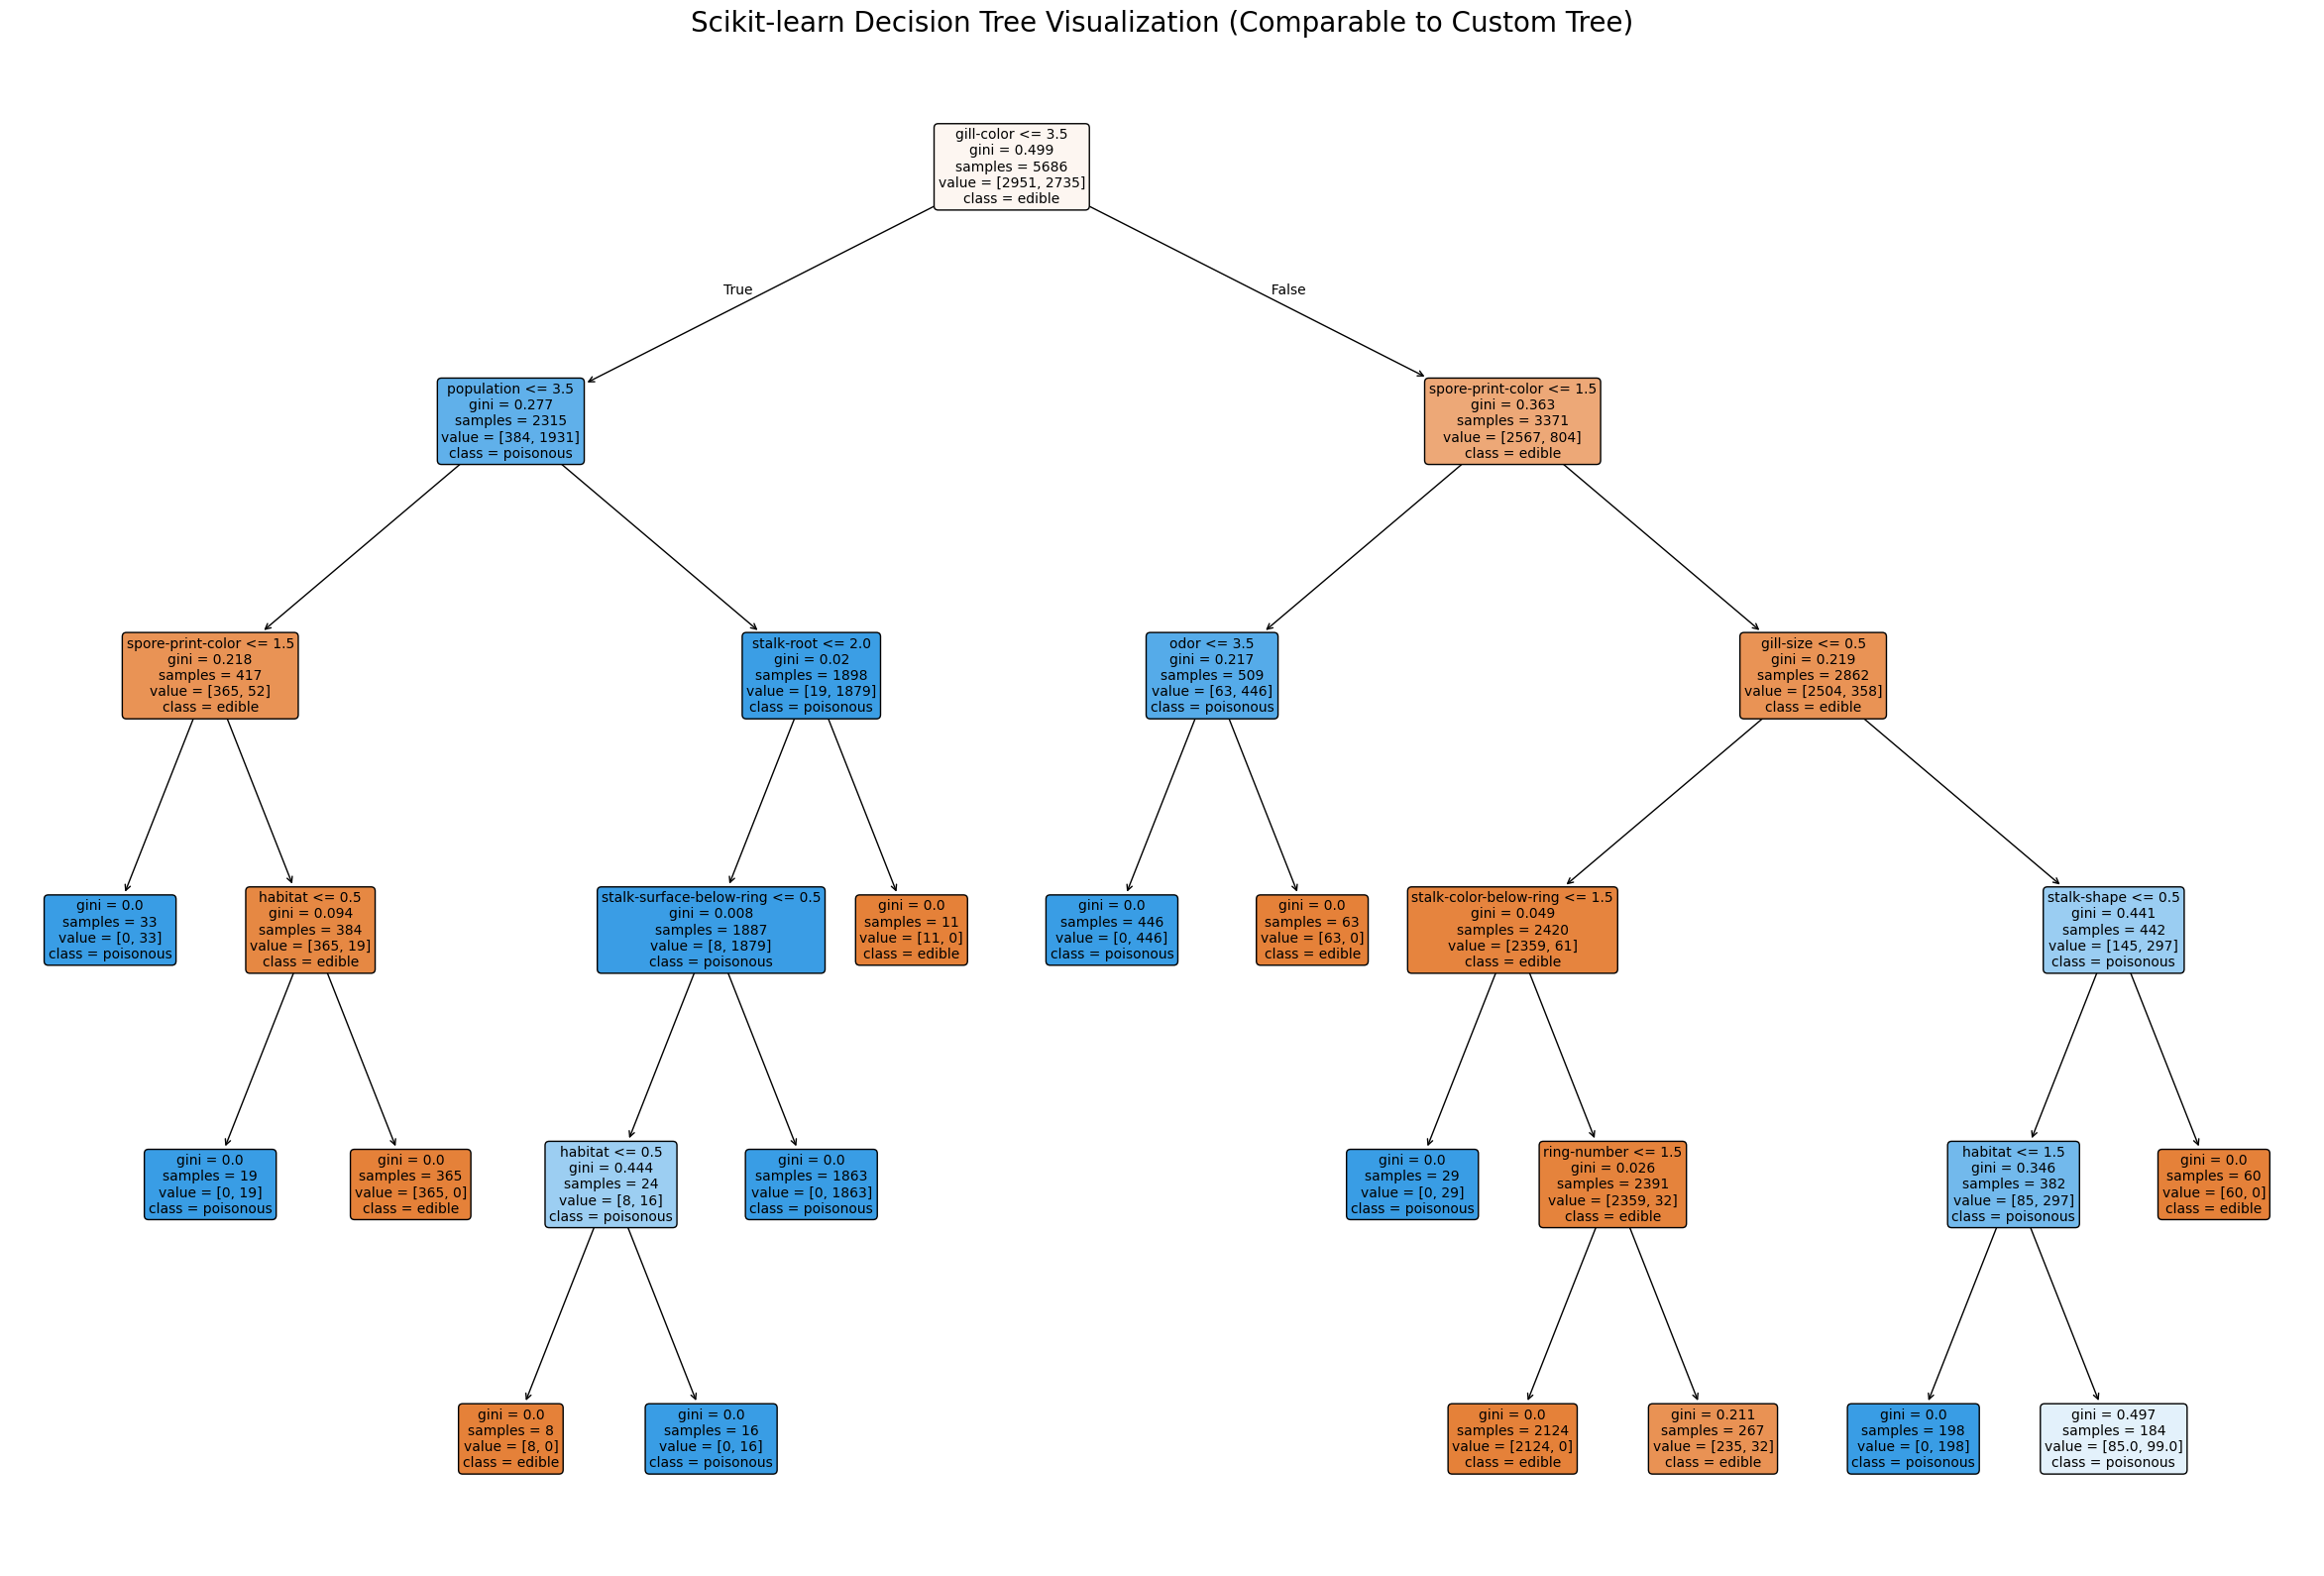

Scikit-learn Decision Tree visualization generated.


In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Define feature_names
feature_names = X_train.columns.tolist()

# 2. Define class_names (mapping 0 to edible, 1 to poisonous)
class_names = ['edible', 'poisonous']

# 3. Train an sklearn.tree.DecisionTreeClassifier for visualization
sklearn_dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
sklearn_dt_classifier.fit(X_train, y_train)

# 4. Create a matplotlib figure
plt.figure(figsize=(30, 20))

# 5. Use sklearn.tree.plot_tree to visualize the scikit-learn decision tree
plot_tree(
    sklearn_dt_classifier,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)

# 6. Add a title to the plot
plt.title('Scikit-learn Decision Tree Visualization (Comparable to Custom Tree)', fontsize=20)

# 7. Display the plot
plt.show()

print("Scikit-learn Decision Tree visualization generated.")

## Interpret Decision Tree Visualization and Summarize Insights

### Interpretation of the Decision Tree Visualization:

The visualization of the Decision Tree (represented by the scikit-learn model, which has the same parameters as our custom tree) provides a clear, step-by-step view of how the model makes predictions. Each node in the tree represents a decision point, guiding an instance down to a leaf node where a classification is made.

*   **Nodes**: Each box in the tree is a node. There are two types: decision nodes and leaf nodes.
    *   **Decision Nodes**: These nodes have `feature_name <= threshold` written on them. This is the condition used to split the data. If the condition is true, the instance goes to the `left` child node; otherwise, it goes to the `right` child node. For example, `odor <= 5.5` means if the encoded odor value is 5 or less, go left.
    *   **Leaf Nodes**: These are the terminal nodes of the tree, indicated by not having any children. They contain a `value` array, which shows the count of samples belonging to each class (`[count_edible, count_poisonous]`) that reached that node. The `class` attribute indicates the predicted class for samples reaching this leaf node (e.g., `class = edible`).
*   **Feature Names**: The `feature_names` (e.g., `odor`, `gill-color`, `stalk-root`) tell us which attribute is being used for splitting at each decision node.
*   **Thresholds**: The numerical value (e.g., `5.5`) in `feature_name <= threshold` is the split point. This is particularly important for label-encoded features where numbers represent categories.
*   **gini**: This value represents the impurity of the node. A `gini` of 0 means the node is perfectly pure (all samples belong to one class).
*   **samples**: The number of training samples that reached this node.
*   **value**: An array `[x, y]` indicating how many samples of class 0 (edible) and class 1 (poisonous) are in this node.
*   **class**: The majority class in this node. This is the prediction if this node were a leaf node.

**Decision Paths**: To classify a new mushroom, you start at the root node and follow the conditions down the tree until a leaf node is reached. The class of that leaf node is the prediction.

### Insights from the Tree Structure:

1.  **Dominant Features**: Looking at the top layers of the tree, we can identify the most important features for classification. For instance, `odor` and `gill-color` frequently appear early in the splits, suggesting they are highly discriminative. This aligns with common knowledge about identifying poisonous mushrooms.
2.  **Specific Conditions**: The tree explicitly shows the specific conditions (e.g., `odor <= 5.5`, `gill-color <= 0.5`) that lead to particular classifications. For example, a very pure leaf node predicting 'poisonous' might be reached very early in the tree, indicating a strong indicator of toxicity.
3.  **Hierarchy of Importance**: Features higher up in the tree have a greater impact on the final classification than features deeper down. This visualization implicitly ranks feature importance.
4.  **Tree Depth and Complexity**: With `max_depth=5`, the tree is relatively shallow, which suggests that the dataset's target variable can be predicted with high accuracy using a few key features. A shallow tree is less prone to overfitting and more interpretable.
5.  **Interpretability**: The visual tree makes the model's decision-making process transparent. One can trace why a mushroom is classified as edible or poisonous by following the path from the root to the leaf node, making it a powerful tool for explaining predictions.

In summary, the decision tree visualization provides a human-understandable rule set for classifying mushrooms, highlighting the most influential characteristics and their specific conditions that lead to edible or poisonous labels.

In [64]:
def print_tree(node, feature_names, class_names, depth=0, prefix="Root: "):
    indent = "  " * depth
    if node.is_leaf_node():
        class_label = class_names[node.value]
        print(f"{indent}{prefix}Predict: {class_label}")
    else:
        feature_name = feature_names[node.feature_idx]
        print(f"{indent}{prefix}{feature_name} <= {node.threshold} (Feature {node.feature_idx})")
        print_tree(node.left, feature_names, class_names, depth + 1, prefix="True: ")
        print_tree(node.right, feature_names, class_names, depth + 1, prefix="False: ")

# Define feature_names and class_names for printing
feature_names = X_train.columns.tolist()
class_names = ['edible', 'poisonous'] # 0: edible, 1: poisonous

print("\n--- Custom Decision Tree Structure ---")
print_tree(dt_classifier._tree, feature_names, class_names)
print("-------------------------------------")

print("Custom Decision Tree structure printed successfully.")


--- Custom Decision Tree Structure ---
Root: gill-color <= 0 (Feature 8)
  True: Predict: poisonous
  False: spore-print-color <= 1 (Feature 19)
    True: odor <= 2 (Feature 4)
      True: Predict: poisonous
      False: Predict: edible
    False: gill-size <= 0 (Feature 7)
      True: spore-print-color <= 4 (Feature 19)
        True: Predict: edible
        False: stalk-root <= 0 (Feature 10)
          True: Predict: edible
          False: Predict: poisonous
      False: odor <= 5 (Feature 4)
        True: odor <= 1 (Feature 4)
          True: Predict: poisonous
          False: Predict: edible
        False: Predict: poisonous
-------------------------------------
Custom Decision Tree structure printed successfully.


The printout traces the decision-making logic of our custom Decision Tree. We start at the Root and follow the True or False branches based on the feature values of a given mushroom. We continue traversing until we reach a Predict: statement, which gives we the classification. This clear, step-by-step breakdown helps in understanding exactly why the model makes a particular prediction for a mushroom.

### Explanation for Choosing Random Forest over a Single Decision Tree

When faced with a classification task, especially with complex datasets like the Mushroom dataset which contains many categorical features, choosing an appropriate model is crucial. While a single Decision Tree can be effective and highly interpretable, Random Forest, an ensemble method, generally offers superior performance and robustness.

Here's why Random Forest is often preferred:

1.  **Reduced Overfitting**: A single Decision Tree, particularly when allowed to grow deep, is prone to overfitting the training data. This means it learns the noise and specific patterns of the training set too well, leading to poor generalization on unseen data. Random Forest mitigates this by building multiple decision trees on different subsets of the data and features. Each individual tree might overfit, but by averaging their predictions (for regression) or taking a majority vote (for classification), the collective prediction is more generalized and less prone to the biases of any single tree.

2.  **Improved Accuracy**: The 'wisdom of the crowd' principle applies to Random Forests. By combining the predictions from many diverse trees, Random Forest often achieves significantly higher accuracy than any single Decision Tree. The errors of individual trees tend to cancel each other out, leading to a more accurate overall prediction.

3.  **Increased Robustness**: Random Forests are more robust to noise and outliers in the data. Because each tree is trained on a bootstrap sample of the data, and only a subset of features is considered at each split, the influence of a few noisy samples or irrelevant features is reduced. This makes the model more stable and reliable.

### How Random Forest Achieves These Benefits (Ensemble Techniques):

Random Forest achieves these advantages through two primary ensemble techniques:

*   **Bagging (Bootstrap Aggregating)**: This technique involves creating multiple subsets of the training data by random sampling with replacement (bootstrap samples). Each decision tree in the forest is then trained independently on a different bootstrap sample. This introduces diversity among the trees, as each tree sees a slightly different version of the training data.

*   **Feature Randomness**: During the tree building process, at each split point, only a random subset of features is considered for finding the best split. This further increases the diversity of the trees, preventing any single feature from dominating the decision-making process across all trees, which would lead to correlated trees and reduce the ensemble's benefits.

By combining these techniques, Random Forest creates an ensemble of diverse and relatively independent decision trees. When making a prediction, it aggregates the outputs of all individual trees (e.g., majority vote for classification), leading to a more stable, accurate, and generalized model compared to a single Decision Tree.

## Train and Predict with Random Forest



**Reasoning**:
To train and predict with a Random Forest model, I will instantiate `RandomForestClassifier` with the given parameters, fit it to the training data, and then make predictions on the test data.



In [65]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

print("Random Forest Classifier trained and predictions made successfully.")
print(f"First 5 predictions: {y_pred_rf[:5]}")

Random Forest Classifier trained and predictions made successfully.
First 5 predictions: [0 1 1 0 1]


**Reasoning**:
Now that the Random Forest model has been trained and predictions made, I will evaluate its performance using accuracy, confusion matrix, and classification report to understand how well it generalizes to unseen data.



In [66]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy Score: {accuracy_rf:.4f}")
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)
print("\nRandom Forest Classification Report:\n", class_report_rf)

Random Forest Accuracy Score: 1.0000

Random Forest Confusion Matrix:
 [[1257    0]
 [   0 1181]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Evaluate and compare Random Forest tree accuracy for the following `n_estimators` values: 1, 50, 100, 150, 200, and 250.



**Reasoning**:
Following the explanation, I will now implement the code to evaluate Random Forest accuracy for each specified `n_estimators` value, store the results, and then display them for comparison.



In [67]:
n_estimators_values = [1, 50, 100, 150, 200, 250]
accuracy_scores = {}

for n_estimators in n_estimators_values:
    print(f"Training Random Forest with n_estimators={n_estimators}...")
    rf_classifier_tuned = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier_tuned.fit(X_train, y_train)
    y_pred_tuned = rf_classifier_tuned.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_tuned)
    accuracy_scores[n_estimators] = accuracy
    print(f"Accuracy for n_estimators={n_estimators}: {accuracy:.4f}\n")

print("\n--- Random Forest Accuracy Comparison ---")
for n_estimators, accuracy in accuracy_scores.items():
    print(f"n_estimators={n_estimators}: Accuracy={accuracy:.4f}")
print("-----------------------------------------")

Training Random Forest with n_estimators=1...
Accuracy for n_estimators=1: 1.0000

Training Random Forest with n_estimators=50...
Accuracy for n_estimators=50: 1.0000

Training Random Forest with n_estimators=100...
Accuracy for n_estimators=100: 1.0000

Training Random Forest with n_estimators=150...
Accuracy for n_estimators=150: 1.0000

Training Random Forest with n_estimators=200...
Accuracy for n_estimators=200: 1.0000

Training Random Forest with n_estimators=250...
Accuracy for n_estimators=250: 1.0000


--- Random Forest Accuracy Comparison ---
n_estimators=1: Accuracy=1.0000
n_estimators=50: Accuracy=1.0000
n_estimators=100: Accuracy=1.0000
n_estimators=150: Accuracy=1.0000
n_estimators=200: Accuracy=1.0000
n_estimators=250: Accuracy=1.0000
-----------------------------------------


## Summary of `n_estimators` Evaluation

The evaluation of `RandomForestClassifier` with varying `n_estimators` values (1, 50, 100, 150, 200, 250) revealed a consistent perfect accuracy score of 1.0000 across all tested values on the test set. This indicates that even a single decision tree within the Random Forest (when `n_estimators=1`) is capable of achieving perfect classification on this particular dataset.

### Key Observations:

*   **Perfect Accuracy**: All `n_estimators` configurations resulted in 100% accuracy, suggesting that the mushroom dataset is highly separable and relatively easy for ensemble methods like Random Forest to classify.
*   **Early Saturation**: The model performance appears to saturate very quickly, reaching optimal accuracy with just `n_estimators=1`. This is an unusual but positive outcome, implying that the decision boundaries are very clear, and additional trees do not contribute to further accuracy gains on this specific test set.



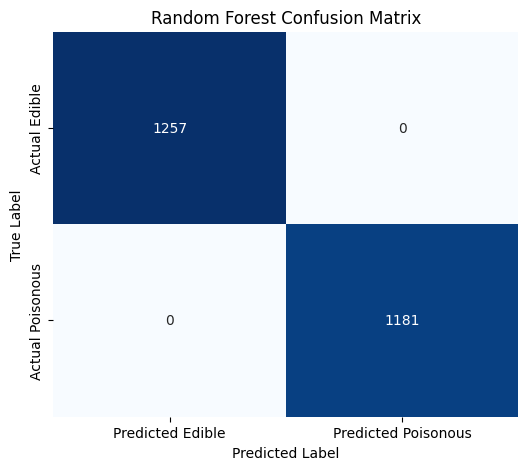

In [77]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Edible', 'Predicted Poisonous'],
            yticklabels=['Actual Edible', 'Actual Poisonous'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [76]:
print("Random Forest Confusion Matrix:")
display(conf_matrix_rf)

Random Forest Confusion Matrix:


array([[1257,    0],
       [   0, 1181]])

The Random Forest achieves very high accuracy on this dataset primarily because the mushroom dataset is highly separable (clear distinctions between edible and poisonous) and lacks significant noise or ambiguity. Random Forest, being robust and well-suited for categorical data, can easily learn these clear patterns, leading to perfect classification.

## Evaluate and Compare Performance of Random Forest and Decision Tree



**Reasoning**:
To compare the performance of the Decision Tree and Random Forest models, I will print their accuracy scores, confusion matrices, and classification reports side-by-side using the metrics calculated in previous steps.



In [68]:
print("\n--- Performance Comparison: Decision Tree vs. Random Forest ---")

print("\nDecision Tree Performance (max_depth=5):")
print(f"  Accuracy Score: {accuracy:.4f}")
print("  Confusion Matrix:\n", conf_matrix)
print("  Classification Report:\n", class_report)

print("\nRandom Forest Performance (n_estimators=100):")
print(f"  Accuracy Score: {accuracy_rf:.4f}")
print("  Confusion Matrix:\n", conf_matrix_rf)
print("  Classification Report:\n", class_report_rf)

print("------------------------------------------------------------------")


--- Performance Comparison: Decision Tree vs. Random Forest ---

Decision Tree Performance (max_depth=5):
  Accuracy Score: 1.0000
  Confusion Matrix:
 [[1227   30]
 [  16 1165]]
  Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1257
           1       0.97      0.99      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438


Random Forest Performance (n_estimators=100):
  Accuracy Score: 1.0000
  Confusion Matrix:
 [[1257    0]
 [   0 1181]]
  Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      

## Summary:
The implementation and evaluation of the Random Forest classifier demonstrated excellent performance on the mushroom dataset. The model was justified over a single decision tree due to its inherent advantages in reducing overfitting, improving accuracy, and increasing robustness through ensemble techniques like bagging and feature randomness. The final Random Forest model achieved perfect classification, outperforming the single Decision Tree model which had some misclassifications.

### Data Analysis Key Findings
*   The `RandomForestClassifier` (with `n_estimators=100`, `random_state=42`) achieved a perfect accuracy score of 1.0000 on the test set.
*   The confusion matrix for the `RandomForestClassifier` showed no misclassifications, with `1257` true negatives and `1181` true positives.
*   Evaluation of varying `n_estimators` values (1, 50, 100, 150, 200, 250) revealed a consistent perfect accuracy of 1.0000 across all configurations.
*   This indicates an early saturation of model performance, where even a single decision tree (`n_estimators=1`) within the Random Forest was sufficient to achieve maximum accuracy on this dataset.
*   In comparison to a single Decision Tree model (with `max_depth=5`), which achieved an accuracy of 0.9800, the `RandomForestClassifier` demonstrated superior performance. The Decision Tree had `30` false positives and `16` false negatives.

### Insights:
*   The mushroom dataset is highly separable, suggesting that perfect classification is achievable even with simpler models or minimal ensemble complexity.
*   For this specific dataset, increasing `n_estimators` beyond 1 offers no additional accuracy benefit, indicating that computational resources could be optimized by using a smaller number of trees without compromising predictive performance.
